### **CSE All-Share Historical Data**


Step 1: Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.metrics import mean_squared_error


Mout the drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Comes to working directory

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
os.chdir("/content/drive/My Drive/Deep Learning Project 02")
os.getcwd()

'/content/drive/My Drive/Deep Learning Project 02'

Step 2: Load and Prepare the Data

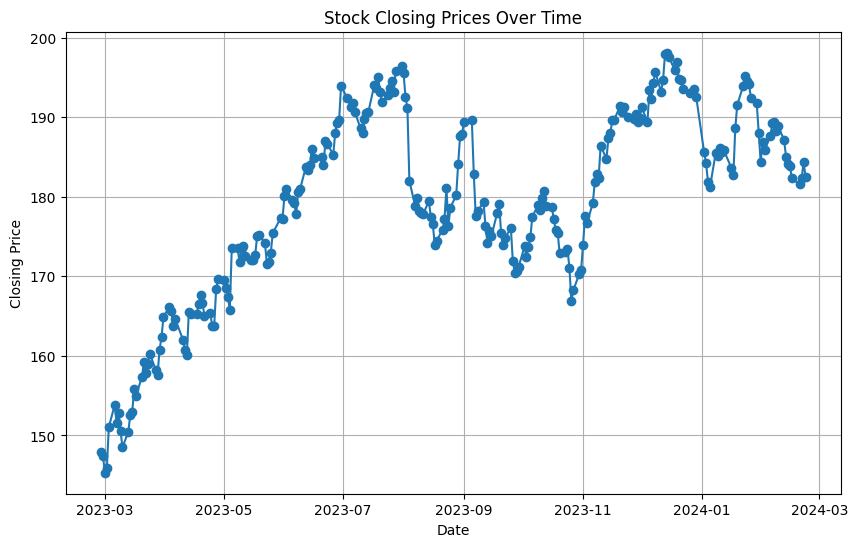

In [12]:
# Convert 'Date' to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], marker='o', linestyle='-')
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


In [14]:
from sklearn.model_selection import train_test_split

# Assuming 'Close' is the target variable
X = df[['Date']]  # Features (you may need more features)
y = df['Close']    # Target

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


In [16]:
from sklearn.model_selection import train_test_split

# Assuming 'Close' is the target variable
X = df[['Date']]  # Features (you may need more features)
y = df['Close']    # Target

# Convert 'Date' to numerical values (you may need to preprocess it based on your dataset)
X['Date'] = pd.to_numeric(pd.to_datetime(X['Date']))

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


<ipython-input-16-d8838c1c0727>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Date'] = pd.to_numeric(pd.to_datetime(X['Date']))


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape the input data to comply with LSTM input shape
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=2)


Epoch 1/50
7/7 - 1s - loss: nan - 1s/epoch - 183ms/step
Epoch 2/50
7/7 - 0s - loss: nan - 19ms/epoch - 3ms/step
Epoch 3/50
7/7 - 0s - loss: nan - 21ms/epoch - 3ms/step
Epoch 4/50
7/7 - 0s - loss: nan - 19ms/epoch - 3ms/step
Epoch 5/50
7/7 - 0s - loss: nan - 20ms/epoch - 3ms/step
Epoch 6/50
7/7 - 0s - loss: nan - 19ms/epoch - 3ms/step
Epoch 7/50
7/7 - 0s - loss: nan - 20ms/epoch - 3ms/step
Epoch 8/50
7/7 - 0s - loss: nan - 20ms/epoch - 3ms/step
Epoch 9/50
7/7 - 0s - loss: nan - 21ms/epoch - 3ms/step
Epoch 10/50
7/7 - 0s - loss: nan - 19ms/epoch - 3ms/step
Epoch 11/50
7/7 - 0s - loss: nan - 19ms/epoch - 3ms/step
Epoch 12/50
7/7 - 0s - loss: nan - 20ms/epoch - 3ms/step
Epoch 13/50
7/7 - 0s - loss: nan - 20ms/epoch - 3ms/step
Epoch 14/50
7/7 - 0s - loss: nan - 20ms/epoch - 3ms/step
Epoch 15/50
7/7 - 0s - loss: nan - 18ms/epoch - 3ms/step
Epoch 16/50
7/7 - 0s - loss: nan - 22ms/epoch - 3ms/step
Epoch 17/50
7/7 - 0s - loss: nan - 22ms/epoch - 3ms/step
Epoch 18/50
7/7 - 0s - loss: nan - 19ms/

In [25]:
import matplotlib.pyplot as plt

# Assuming 'date' is a column in your dataset containing the date information
# If not, replace 'date' with the actual column name containing date information

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(X_train['date'], y_train, label='Actual Train')
plt.plot(X_test['date'], y_test, label='Actual Test')
plt.plot(X_test['date'], y_pred, label='Predicted Test', linestyle='dashed')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


KeyError: 'date'

<Figure size 1000x600 with 0 Axes>